In [1]:
import numpy as np
import PIL
import random
from PIL import Image
from PIL import ImageDraw

In [2]:
def createPalette(number):
    palette = []
    number = int(number)
    for i in range(number):
        R = random.randint(0,255)
        G = random.randint(0,255)
        B = random.randint(0,255)
        palette.append((R,G,B))
    return(palette)

In [3]:
def gen_sprite(size, colors):
    size = int(size)
    im = Image.new("RGB", (size,size))
    draw = PIL.ImageDraw.Draw(im,None)
    colors = int(colors)
    palette = createPalette(colors)
    if size % 2 == 0:
        for i in range(size):
            num_to_color = int(np.random.normal(size/4,size/12))
            x_coords = random.sample(range(int(size/2)), num_to_color)
            for j in x_coords:
                color = palette[random.randint(0,int(colors)-1)]
                draw.point((j,i),color)
        crop = im.crop((0,0,int(size/2),size))
        crop = crop.transpose(PIL.Image.FLIP_LEFT_RIGHT)
        im.paste(crop, (int(size/2),0,size,size))

    if size % 2 == 1:
        for i in range(size):
            num_to_color = int(np.random.normal(size/4,size/12))
            x_coords = random.sample(range(int((size+1)/2)), num_to_color)
            for j in x_coords:
                color = palette[random.randint(0,int(colors)-1)]
                draw.point((j,i),color)
        crop = im.crop((0,0,int(size/2),size))
        crop = crop.transpose(PIL.Image.FLIP_LEFT_RIGHT)
        im.paste(crop, (int((size+1)/2),0,size,size))
        
        num_to_color = random.randint(0, int(size))
        y_coords = random.sample(range(size), num_to_color)

        for k in y_coords:
            color = palette[random.randint(0,int(colors)-1)]
            draw.point( (int(size/2), k) , color )
    
    return im

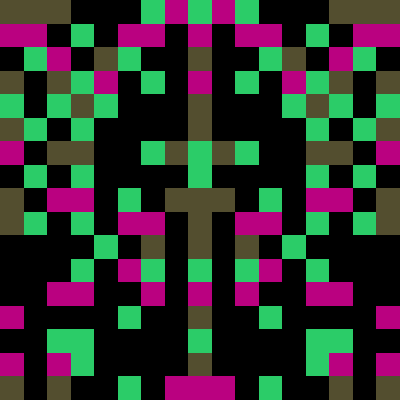

In [7]:
sprite = gen_sprite(17,3)
sprite = sprite.resize((400,400),PIL.Image.NEAREST)
sprite

In [46]:
sprite.save("normal_iguana_17_3.png")